In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
#reading the dataset
#get the dataset 'sonar.csv' at
def read_dataset(file_name):
  dir_path='gdrive/My Drive/'
  df=pd.read_csv(dir_path+file_name,delimiter=',')
  print('Nbr columns:',len(df.columns))
  X=df[df.columns[0:60]].values
  y=df[df.columns[60]]
  #encoder the dependent variable
  encoder=LabelEncoder()
  encoder.fit(y)
  y=encoder.transform(y)
  Y=one_hot_encode(y)
  print('X.shape',X.shape)
  print('Y.shape',Y.shape)
  return(X,Y)

In [0]:
#define the encoder fun M=>1,R=>0
def one_hot_encode(labels):
  n_labels=len(labels)
  # n_unique_labels=len(np.unique(labels))
  n_unique_labels=2
  one_hot_encode=np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels]=1
  return one_hot_encode

In [29]:
from google.colab import drive
drive.mount('/content/gdrive/') 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [30]:
#read the dataset
X,Y=read_dataset('sonar.csv')

# shuffle the adataset to mix up the rows
X,Y=shuffle(X,Y,random_state=1)

Nbr columns: 61
X.shape (207, 60)
Y.shape (207, 2)


In [31]:
#convert the dataset into train and test dataset
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=415)

#inscept the sahpe of the train an dtest dataset
print('train_x.shape',train_x.shape)
print('train_y.shape',train_y.shape)
print('test_x.shape',test_x.shape)
print('test_y.shape',test_y.shape)

train_x.shape (165, 60)
train_y.shape (165, 2)
test_x.shape (42, 60)
test_y.shape (42, 2)


In [32]:
#define the hyperparmeter
learning_rate=0.3
training_epochs=1000
cost_history=np.empty(shape=[1],dtype=float)
#number of feature <=> number of columns
n_dim=X.shape[1]
print('n_dim',n_dim)
print()

n_class=2

n_dim 60



In [0]:
#define no of hidden layers
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [0]:
#input and output
X=tf.placeholder(tf.float32,[None,n_dim])
y_=tf.placeholder(tf.float32,[None,n_class])

In [0]:
#define weight and biases for each layer

weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1]),name='h1'),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2]),name='h2'),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3]),name='h3'),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4]),name='h4'),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]),name='out'),
}

biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1]),name='b1'),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2]),name='b2'),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3]),name='b3'),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4]),name='b4'),
    'out_b':tf.Variable(tf.truncated_normal([n_class]),name='out_b'),
}

In [0]:
#model
def multilayer_preceptron(x,weights,biases):
  #hidden layer with relu activation
  layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1=tf.nn.relu(layer_1)
  #sigmod
  layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  layer_2=tf.nn.sigmoid(layer_2)
  #sigmoid
  layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
  layer_3=tf.nn.relu(layer_3)
  #
  layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
  layer_4=tf.nn.sigmoid(layer_4)
  #output
  out_layer=tf.matmul(layer_4,weights['out'])+biases['out_b']
  return out_layer

In [0]:
#intialization
init = tf.global_variables_initializer()
#call your model defined
y = multilayer_preceptron(X, weights,biases)
#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
trianing_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [60]:
#launch the graph
sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

#Calculate the cost and accuracy for each epoch
for epoch in range(training_epochs):
  sess.run(trianing_step,feed_dict = {X:train_x, y_:train_y})
  cost = sess.run(cost_function,feed_dict={X:train_x, y_:train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

  pred_y = sess.run(y,feed_dict={X:test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)

  accuracy = (sess.run(accuracy,feed_dict ={X:train_x,y_:train_y}))
  accuracy_history.append(accuracy)

  #if epoch 50==0
  print('epoch:',epoch,'-','cost',cost,'-MSE:',mse_,"train Accuracy:",accuracy)

epoch: 0 - cost 3.373397 -MSE: 11.614238101884913 train Accuracy: 0.45454547
epoch: 1 - cost 2.914942 -MSE: 13.754660834120413 train Accuracy: 0.54545456
epoch: 2 - cost 2.9415667 -MSE: 9.716294996668937 train Accuracy: 0.45454547
epoch: 3 - cost 2.9591339 -MSE: 14.567548978004274 train Accuracy: 0.54545456
epoch: 4 - cost 1.0786564 -MSE: 5.235111815002005 train Accuracy: 0.46666667
epoch: 5 - cost 1.7229396 -MSE: 9.020213963785926 train Accuracy: 0.54545456
epoch: 6 - cost 1.9032463 -MSE: 10.440085113302965 train Accuracy: 0.45454547
epoch: 7 - cost 2.3369527 -MSE: 11.742782890821038 train Accuracy: 0.54545456
epoch: 8 - cost 1.158041 -MSE: 4.34058184263552 train Accuracy: 0.47272727
epoch: 9 - cost 1.8670377 -MSE: 8.22241492655027 train Accuracy: 0.54545456
epoch: 10 - cost 1.4833465 -MSE: 6.615149542414715 train Accuracy: 0.45454547
epoch: 11 - cost 1.9737395 -MSE: 10.089417179896227 train Accuracy: 0.54545456
epoch: 12 - cost 1.1279072 -MSE: 6.357788176948842 train Accuracy: 0.4727

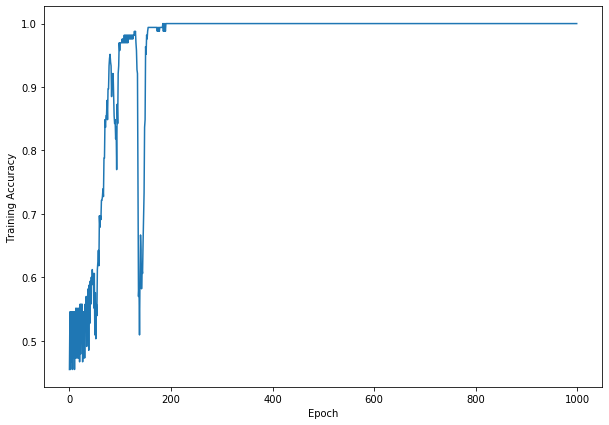

In [61]:
#plot training accuracy graph
plt.figure(figsize=(10,7))
plt.plot(accuracy_history)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.show()

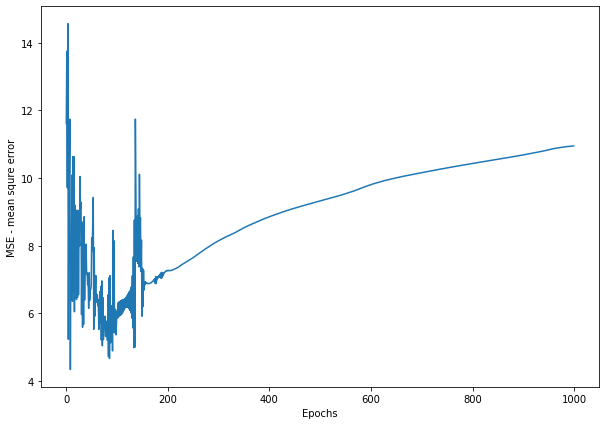

In [62]:
#Filter the mse_history to remove the outliers
filtered_mse_history = []
for mse in mse_history:
  #remove the outlier where mse >=50
  if mse< 50:
    filtered_mse_history.append(mse)

#plot filtered MSE graph
plt.figure(figsize=(10,7))
plt.plot(filtered_mse_history)
plt.xlabel("Epochs")
plt.ylabel("MSE - mean squre error")
plt.show()